#### Importing Packages

In [142]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import os
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from glob import glob
import time
import math as math
import matplotlib.pyplot as plt
import json
import re
import string

import nltk
import nltk.corpus
from nltk.tokenize import sent_tokenize, word_tokenize, WhitespaceTokenizer
from nltk.stem.porter import PorterStemmer



from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import seaborn as seabornInstance 
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error

import scipy as sp
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from statsmodels.graphics.api import abline_plot
from lime import lime_tabular
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold


from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression



%matplotlib inline
import matplotlib.pyplot as plt
import random 
import seaborn as sns

from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

### Reading the Data

In [26]:
# Opening JSON file
Big5json = open('big5.json',)
 
# returns JSON object as a dictionary
big5 = []
for line in open('big5.json', 'r'):
    big5.append(json.loads(line))
     
# Closing JSON file
Big5json.close()

df = pd.DataFrame(big5)


In [143]:
df.head(10)

userid  \
0  0028c7db14b7a987bac0f3163239eaa9   
1  0028c7db14b7a987bac0f3163239eaa9   
2  0028c7db14b7a987bac0f3163239eaa9   
3  0028c7db14b7a987bac0f3163239eaa9   
4  0028c7db14b7a987bac0f3163239eaa9   
5  0028c7db14b7a987bac0f3163239eaa9   
6  0028c7db14b7a987bac0f3163239eaa9   
7  0028c7db14b7a987bac0f3163239eaa9   
8  0028c7db14b7a987bac0f3163239eaa9   
9  0028c7db14b7a987bac0f3163239eaa9   

                                       status_update  ope  con  ext   agr  \
0  take good bad smile sad love got rememb alway ...  3.5  4.5  1.0  2.75   
1                           work two stupid boy till  3.5  4.5  1.0  2.75   
2                                 librari anyon need  3.5  4.5  1.0  2.75   
3        librari twin love ksu close road still lame  3.5  4.5  1.0  2.75   
4                                           autoshow  3.5  4.5  1.0  2.75   
5           barri manilow rachael ray make smile lol  3.5  4.5  1.0  2.75   
6               bathroom remodel final weekend begun  3.5  4.5  1.0  2.75   
7                         bathroom remodel quit task  3.5  4.5  1.0  2.75   
8  class time mri time least get hang mom later work  3.5  4.5  1.0  2.75   
9  day bathroom remodel ridicul day one way less ...  3.5  4.5  1.0  2.75   

    neu   pca-one   pca-two  tsne-2d-one  tsne-2d-two  tsne-2d-one-pca  \
0  4.75  0.034813  0.032902     0.038860    -1.186329         4.187700   
1  4.75  0.008642  0.076585    -0.003777    -0.592362        -1.030575   
2  4.75 -0.038750  0.018291     0.086354     0.917987        -3.025335   
3  4.75 -0.000501 -0.060843     0.181837    -0.344674        -2.485204   
4  4.75 -0.035767 -0.018325    -0.010928     0.250832         2.344324   
5  4.75 -0.025270 -0.014032     0.073253     0.930296         4.488974   
6  4.75 -0.020631 -0.009583    -0.082114    -0.023224         4.918079   
7  4.75 -0.034833 -0.020663    -0.015341    -0.004189        -1.924240   
8  4.75  0.020979  0.121597     0.080543     1.016418        -4.793234   
9  4.75  0.255048  0.042940     0.034845    -0.187001         8.203088   

   tsne-2d-two-pca  
0        -4.025589  
1        -6.324955  
2        -5.708866  
3         6.843373  
4         0.162726  
5         5.904948  
6         3.452210  
7         5.907044  
8        -5.031131  
9        -6.143077

In [ ]:
df.dtypes

### Exploring the data

In [ ]:
#Checking duplication in id
duplicateDFid = df[df.userid.duplicated()]
#duplicateDFStatus.to_csv('duplicateDFStatus', index=False)
len(duplicateDFid)

In [ ]:
#Checking duplication in rows
duplicateDFRow = df[df.duplicated()]
duplicateDFRow.to_csv('duplicateDFRow', index=False)
len(duplicateDFRow)

In [27]:
# Remove 95 duplicated instances
df = df.drop_duplicates()
len (df)

25355

In [ ]:
df['ope'].value_counts()

In [ ]:
df['con'].value_counts()

In [ ]:
df['ext'].value_counts()

In [ ]:
df['agr'].value_counts()

In [ ]:
df['neu'].value_counts()

<AxesSubplot:ylabel='Frequency'>

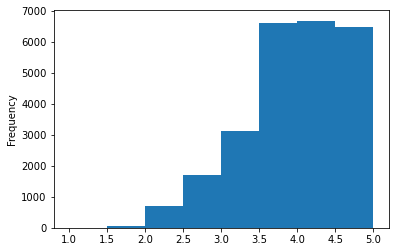

In [14]:
df['ope'].plot(kind='hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

<AxesSubplot:ylabel='Frequency'>

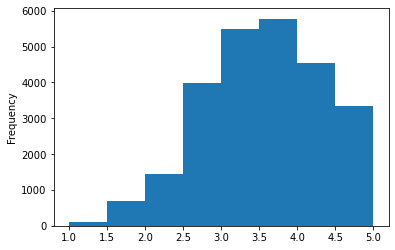

In [15]:
df['con'].plot(kind='hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

<AxesSubplot:ylabel='Frequency'>

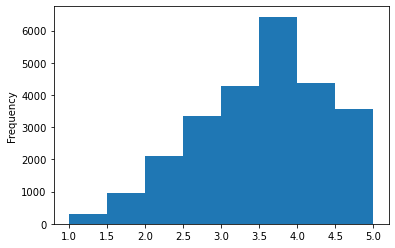

In [16]:
df['ext'].plot(kind='hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

<AxesSubplot:ylabel='Frequency'>

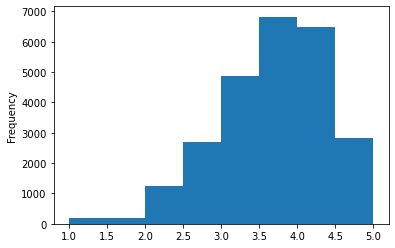

In [17]:
df['agr'].plot(kind='hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

<AxesSubplot:ylabel='Frequency'>

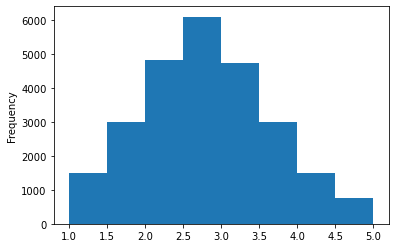

In [18]:
df['neu'].plot(kind='hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

## Clustering

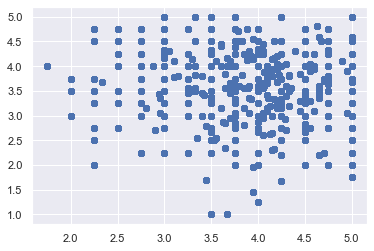

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

plt.scatter(df['ope'],df['agr'])
plt.show()

Text(0.5, 0, 'Number of clusters')

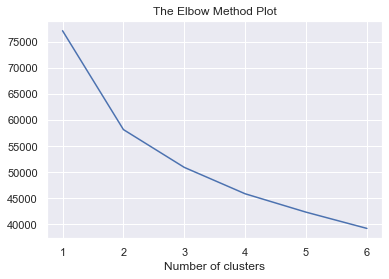

In [82]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method Plot')
plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')

In [76]:
x = df.iloc[:,2:7]

kmeans = KMeans(2)
clusters = kmeans.fit_predict(x)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = clusters

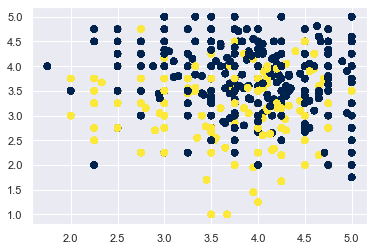

In [77]:
plt.scatter(data_with_clusters['ope'],data_with_clusters['agr'],c=data_with_clusters['Clusters'],cmap='cividis')

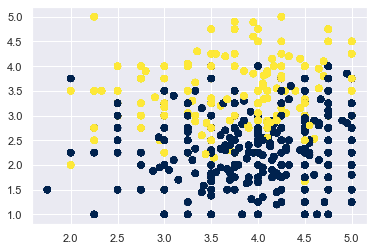

In [68]:
plt.scatter(data_with_clusters['ope'], data_with_clusters['neu'],c=data_with_clusters['Clusters'],cmap='cividis')

Text(0, 0.5, 'Extraversion')

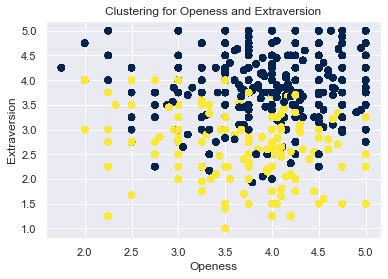

In [81]:
plt.scatter(data_with_clusters['ope'], data_with_clusters['ext'],c=data_with_clusters['Clusters'],cmap='cividis')
plt.title("Clustering for Openess and Extraversion")
plt.xlabel("Openess")
plt.ylabel("Extraversion")

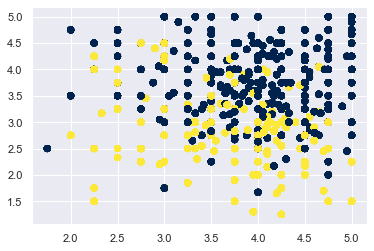

In [70]:
plt.scatter(data_with_clusters['ope'], data_with_clusters['con'],c=data_with_clusters['Clusters'],cmap='cividis')

Text(0, 0.5, 'Neuroticism')

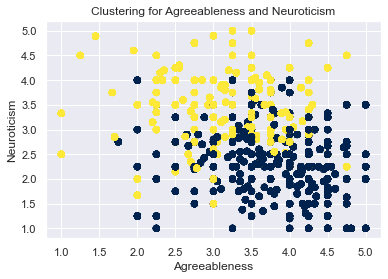

In [83]:
plt.scatter(data_with_clusters['agr'], data_with_clusters['neu'],c=data_with_clusters['Clusters'],cmap='cividis')
plt.title("Clustering for Agreeableness and Neuroticism")
plt.xlabel("Agreeableness")
plt.ylabel("Neuroticism")

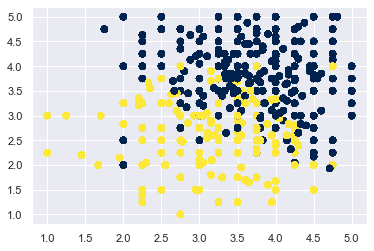

In [72]:
plt.scatter(data_with_clusters['agr'], data_with_clusters['ext'],c=data_with_clusters['Clusters'],cmap='cividis')

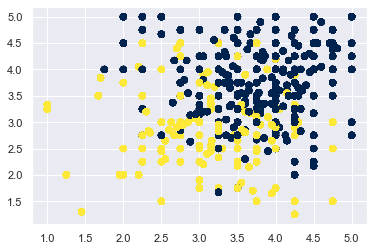

In [73]:
plt.scatter(data_with_clusters['agr'], data_with_clusters['con'],c=data_with_clusters['Clusters'],cmap='cividis')

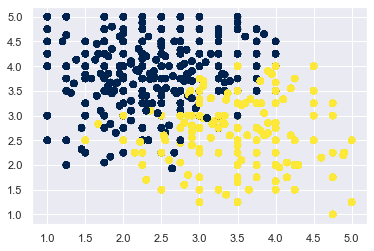

In [78]:
plt.scatter(data_with_clusters['neu'], data_with_clusters['ext'],c=data_with_clusters['Clusters'],cmap='cividis')

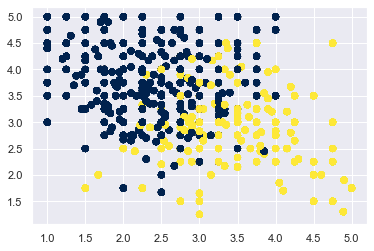

In [79]:
plt.scatter(data_with_clusters['neu'], data_with_clusters['con'],c=data_with_clusters['Clusters'],cmap='cividis')

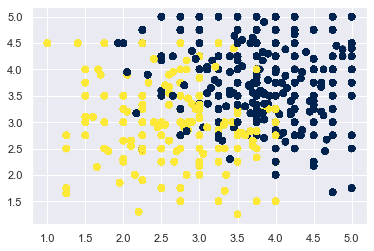

In [80]:
plt.scatter(data_with_clusters['ext'], data_with_clusters['con'],c=data_with_clusters['Clusters'],cmap='cividis')

In [28]:
# Sort and groupby the data based on user ID
df  = df.sort_values(by=['userid'])
df = df.groupby(['userid', 'status_update'], as_index=False).sum()

In [ ]:
df.head(55)

## Grouped Data 

In [ ]:
#group by id
status_num = df.groupby('userid')['userid'].count()
status_num # max posts for a user is 50 and min posts for a user is 46 && I have 509 users

In [ ]:
max(status_num)

In [ ]:
min(status_num)

In [ ]:
df_agg = df.groupby('userid',as_index=False).agg('status_update')

In [ ]:
df_agg.ngroups #number of groups 

In [ ]:
df_agg.size() # each user with number of statuses

In [ ]:
df_agg.groups # all the users with their stautses

In [ ]:
df_agg = df.groupby('userid',as_index=False).agg('status_update')

In [ ]:
df_agg.get_group('0028c7db14b7a987bac0f3163239eaa9')# all the updated statuses for 0028c7db14b7a987bac0f3163239eaa9 user

## Data Profile

In [ ]:
profile = ProfileReport(Big5DF, title="Big 5 Profiling Report")

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_file("Big 5 Profiling Report.html")

## Topic Modeling Visulaization

## All the statuses

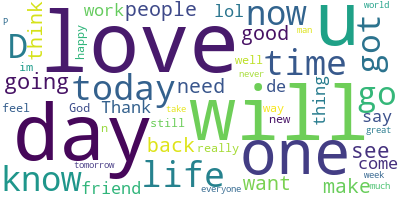

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['status_update'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=5, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()


## [Openess]

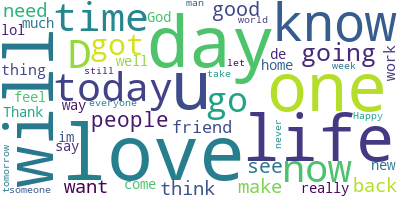

In [30]:
ope= df.loc[df['ope'] >= 4, 'status_update']

# Join the different processed titles together.
long_string = ','.join(list(ope.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## [conscientiousness]

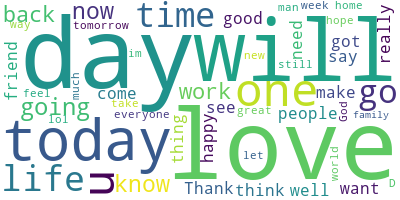

In [32]:
con= df.loc[df['con'] >= 4, 'status_update']

# Join the different processed titles together.
long_string = ','.join(list(con.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## [extraversion]

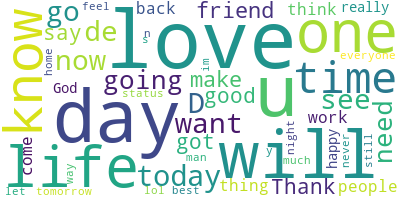

In [33]:
ext= df.loc[df['ext'] >= 4, 'status_update']

# Join the different processed titles together.
long_string = ','.join(list(ext.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## [agreeableness]

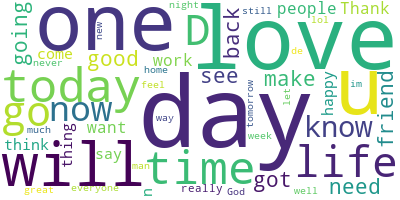

In [34]:
agr= df.loc[df['agr'] >= 4, 'status_update']

# Join the different processed titles together.
long_string = ','.join(list(agr.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## [neuroticism]

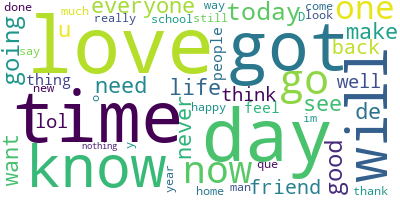

In [35]:
neu= df.loc[df['neu'] >= 4, 'status_update']

# Join the different processed titles together.
long_string = ','.join(list(neu.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Preprocessing Text Data

In [29]:
def PreprocessingStatus(status):
    letters_only = re.sub("[^a-zA-Z]",      # Search for all non-letters
                          " ",              # Replace all non-letters with spaces
                          str(status))      # Column and row to search    

    words = letters_only.lower().split()    #Lowecases && Splitting 
    stops = set(stopwords.words("english")) #Stopwords   
    ps = PorterStemmer()                    #Stemming
    filteredwords = [ps.stem(w) for w in words if not w in stops]
    filteredwords = " ".join(filteredwords)
    return (filteredwords) 

df['status_update'] = df.apply(lambda row: PreprocessingStatus(row['status_update']), axis=1)

## Topic Modeling

In [154]:
#tokenization from NLTK
tokenized_sents = df.apply(lambda row: nltk.word_tokenize(row['status_update']), axis=1) #apply tokenization
#df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1) #count words
data_words= list(tokenized_sents)
print(data_words[:1])

[['take', 'good', 'bad', 'smile', 'sad', 'love', 'got', 'rememb', 'alway', 'forgiv', 'never', 'forget', 'learn', 'mistak', 'never', 'regret', 'peopl', 'chang', 'thing', 'go', 'wrong', 'rememb', 'life', 'goe']]


In [151]:
# Import Packages
from pprint import pprint

# Gensim
import smart_open
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
# Creating Bigram and Trigram Models

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [166]:
# Defining Bigram and Trigram and Lemmatization Functions
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [158]:
# Form Bigrams
data_words = make_bigrams(data_words)

In [167]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_words = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_words[:1])

[['take', 'good', 'bad', 'smile', 'sad', 'love', 'get', 'rememb', 'alway', 'never', 'forget', 'learn', 'mistak', 'never', 'regret', 'thing', 'go', 'wrong', 'rememb', 'life', 'goe']]


In [170]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


In [178]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [179]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.081*"get" + 0.030*"m" + 0.030*"make" + 0.029*"see" + 0.028*"come" + '
  '0.023*"back" + 0.022*"home" + 0.017*"look" + 0.016*"long" + 0.015*"u"'),
 (1,
  '0.040*"say" + 0.021*"week" + 0.014*"wonder" + 0.013*"fuck" + 0.012*"hard" + '
  '0.012*"r" + 0.010*"com" + 0.010*"birthday" + 0.009*"away" + 0.008*"amaz"'),
 (2,
  '0.050*"go" + 0.050*"day" + 0.034*"good" + 0.029*"time" + 0.026*"today" + '
  '0.021*"work" + 0.019*"thank" + 0.017*"feel" + 0.016*"new" + 0.015*"last"'),
 (3,
  '0.047*"love" + 0.040*"know" + 0.032*"think" + 0.024*"need" + 0.024*"friend" '
  '+ 0.020*"want" + 0.014*"find" + 0.014*"p" + 0.012*"alway" + 0.012*"hour"'),
 (4,
  '0.031*"life" + 0.023*"well" + 0.020*"much" + 0.019*"thing" + 0.018*"never" '
  '+ 0.018*"tomorrow" + 0.017*"take" + 0.017*"hope" + 0.016*"let" + '
  '0.011*"keep"')]


In [180]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.408494725525049

Coherence Score:  0.301763337940406


In [181]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.337698  0.022122       1        1  27.293043
0      0.115894  0.291565       2        1  20.785857
4      0.090109 -0.168457       3        1  19.721484
3      0.083267 -0.117892       4        1  19.260369
1      0.048427 -0.027338       5        1  12.939247, topic_info=         Term         Freq        Total Category  logprob  loglift
3         get  2502.000000  2502.000000  Default  30.0000  30.0000
4          go  2042.000000  2042.000000  Default  29.0000  29.0000
45        day  2037.000000  2037.000000  Default  28.0000  28.0000
9        love  1349.000000  1349.000000  Default  27.0000  27.0000
188      know  1153.000000  1153.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1019  comment   118.272526   119.042047   Topic5  -5.0930   2.0384
964     write   117.872384   118.645664   Topic5  -5.0964   2.0384
899     power   112.213340   112.987487   Topic5  -5.1456   2.0380
147       far   110.250758   111.011759   Topic5  -5.1633   2.0380
1772  histori   110.849746   111.630817   Topic5  -5.1578   2.0379

[185 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
796       2  0.994575  almost
0         4  0.997354   alway
93        5  0.996195    amaz
122       4  0.997078   anoth
22        4  0.998927   anyon
...     ...       ...     ...
21        1  0.998667    work
581       2  0.997472   world
964       5  0.994558   write
18        3  0.993825   wrong
309       1  0.997732    year

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])

## TF-IDF

In [30]:
# Vectorizing of document using TF-IDF

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['status_update'])

In [39]:
X

<25355x30282 sparse matrix of type '<class 'numpy.float64'>'
	with 215402 stored elements in Compressed Sparse Row format>

# MODELS

## Linear Regression

## [Openess]

In [31]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.09789
R2 (explained variance): 0.00958
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.22773
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


In [ ]:
sns.lmplot(x= "ope", y="ext", data=df);

## [conscientiousness]

In [32]:
ycon= df['con']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, ycon, test_size = 0.2, random_state = 1)

# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.10278
R2 (explained variance): 0.01056
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.30733
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [33]:
yext= df['ext']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.10287
R2 (explained variance): 0.01058
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.35436
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [34]:
yagr= df['agr']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.08726
R2 (explained variance): 0.00761
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.27839
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [neuroticism]

In [35]:
yneu= df['neu']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.10459
R2 (explained variance): 0.01094
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.43105
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Ridge Regression

## [Openess]

In [51]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yope, test_size = 0.2, random_state = 1)

# call Regression model
model = Ridge(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.20814
R2 (explained variance): 0.04332
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15243
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [conscientiousness]

In [52]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, ycon, test_size = 0.2, random_state = 1)

# call Regression model
model = Ridge(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.24463
R2 (explained variance): 0.05984
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20155
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [53]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yext, test_size = 0.2, random_state = 1)

# call Regression model
model = Ridge(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.24374
R2 (explained variance): 0.05941
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24322
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [54]:
yext= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yagr, test_size = 0.2, random_state = 1)

# call Regression model
model = Ridge(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.21225
R2 (explained variance): 0.04505
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.17905
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [55]:
yext= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yneu, test_size = 0.2, random_state = 1)

# call Regression model
model = Ridge(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.2274
R2 (explained variance): 0.05171
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.28786
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Lasso Regression

## Openness

In [56]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yope, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): -0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15764
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Conscientiousness

In [57]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, ycon, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): nan
R2 (explained variance): nan
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20931
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## Extraversion

In [58]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yext, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.25273
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Agreeableness

In [59]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yagr, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): nan
R2 (explained variance): nan
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.18462
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## Neuroticism

In [60]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yneu, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): -0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29855
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## ElasticNet Regression

## Openness

In [61]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yope, test_size = 0.2, random_state = 1)

# call Regression model
model = ElasticNet(random_state=0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): -0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15764
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Conscientiousness

In [62]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, ycon, test_size = 0.2, random_state = 1)

# call Regression model
model = ElasticNet(random_state=0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): nan
R2 (explained variance): nan
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20931
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## Extraversion 

In [63]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yext, test_size = 0.2, random_state = 1)

# call Regression model
model = ElasticNet(random_state=0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.25273
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Agreeableness

In [64]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yagr, test_size = 0.2, random_state = 1)

# call Regression model
model = ElasticNet(random_state=0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): nan
R2 (explained variance): nan
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.18462
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## Neuroticism

In [65]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yneu, test_size = 0.2, random_state = 1)

# call Regression model
model = Lasso(alpha=1.0)

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): -0.0
R2 (explained variance): 0.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29855
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## IncrementalPCA

In [85]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)

## PCA Visualization

In [86]:
df['pca-one'] = X_ipca[:,0]
df['pca-two'] = X_ipca[:,1] 

Text(0.5, 1.0, 'PCA for Openness')

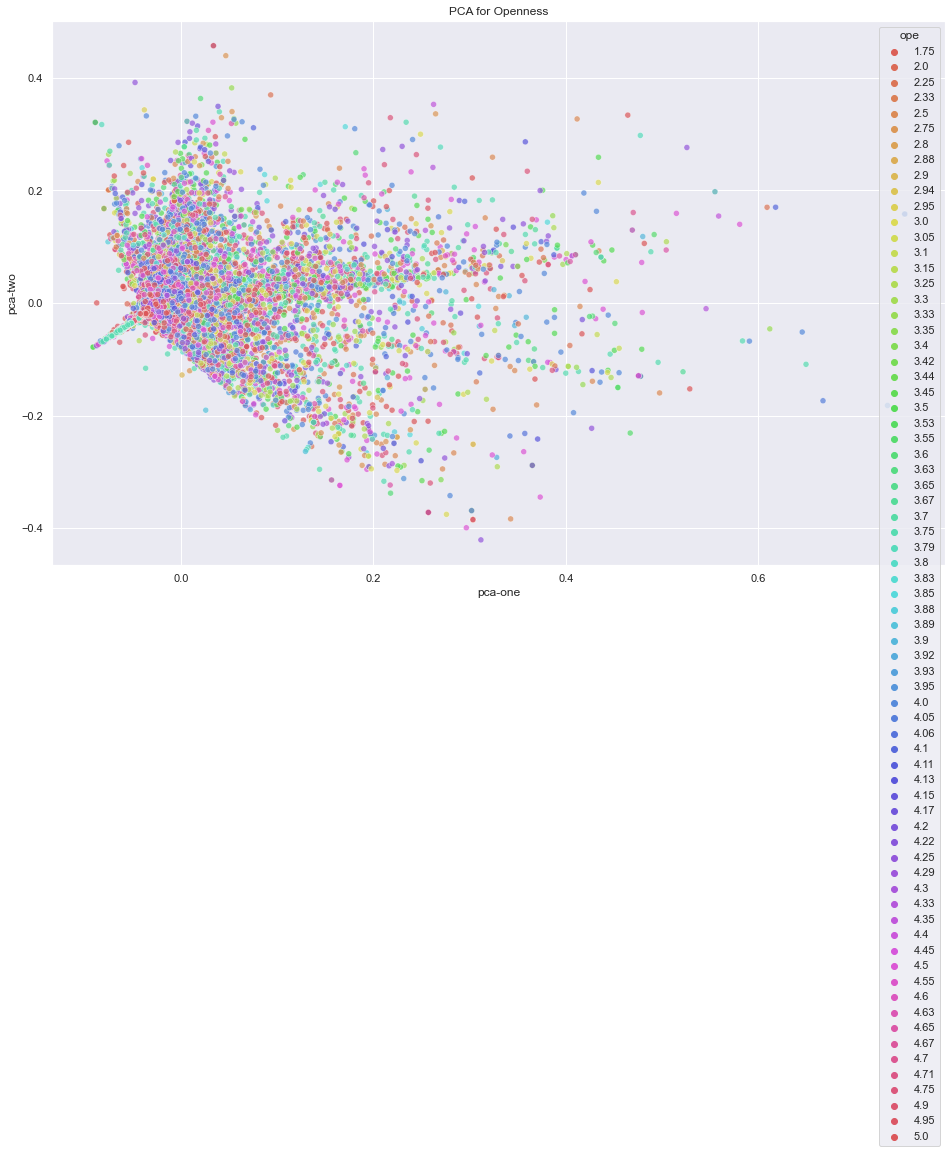

In [112]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= yope,
    palette=sns.color_palette("hls", 71),
    data=df.loc[:,:],
    legend="auto",
    alpha=0.7
)
plt.title ("PCA for Openness")

Text(0.5, 1.0, 'PCA for Consciousness')

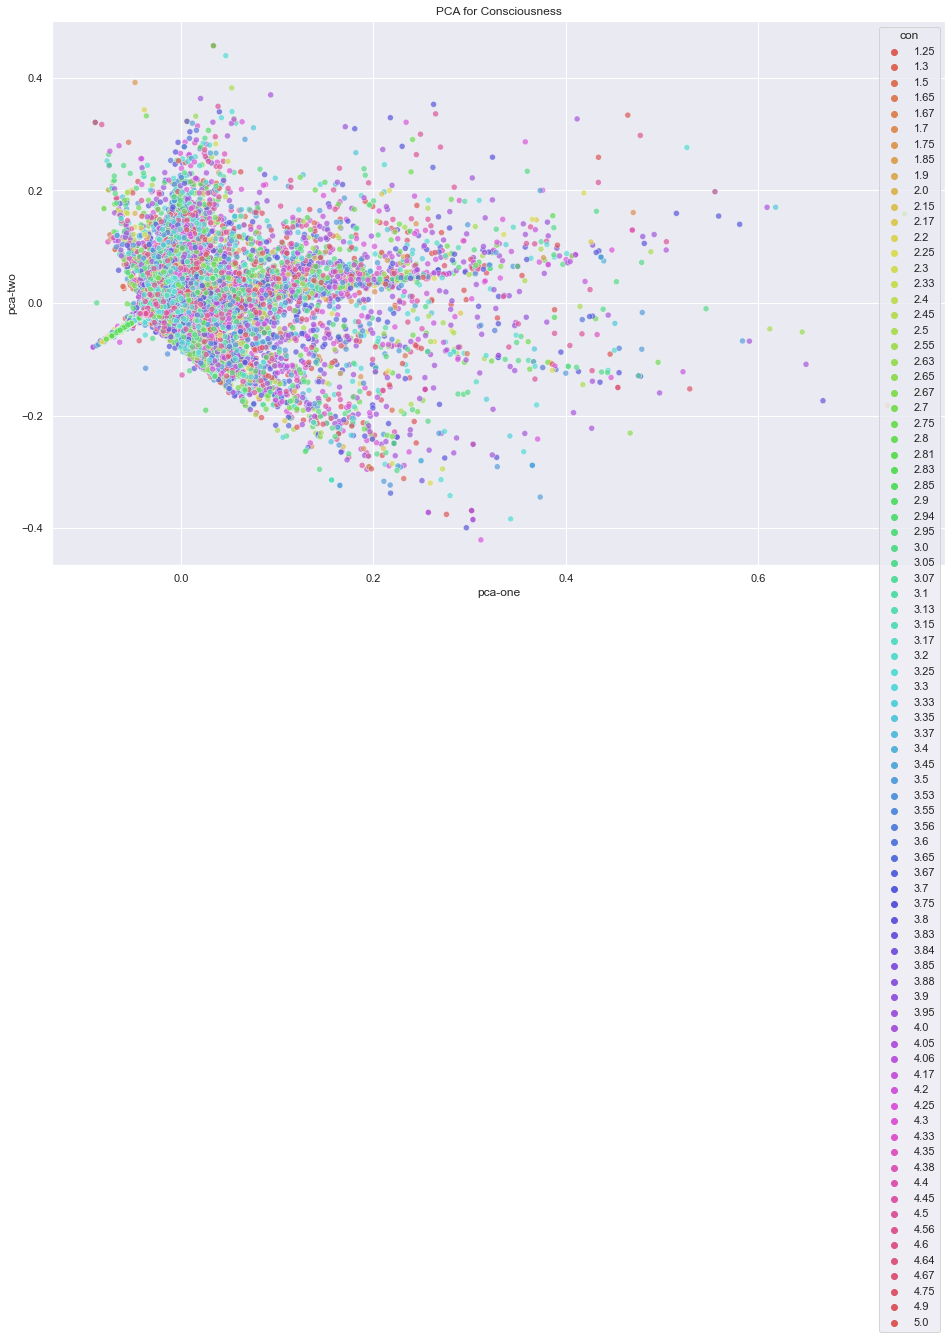

In [111]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= ycon,
    palette=sns.color_palette("hls", 83),
    data=df.loc[:,:],
    legend="auto",
    alpha=0.7
)
plt.title ("PCA for Consciousness")

Text(0.5, 1.0, 'PCA for Extraversion')

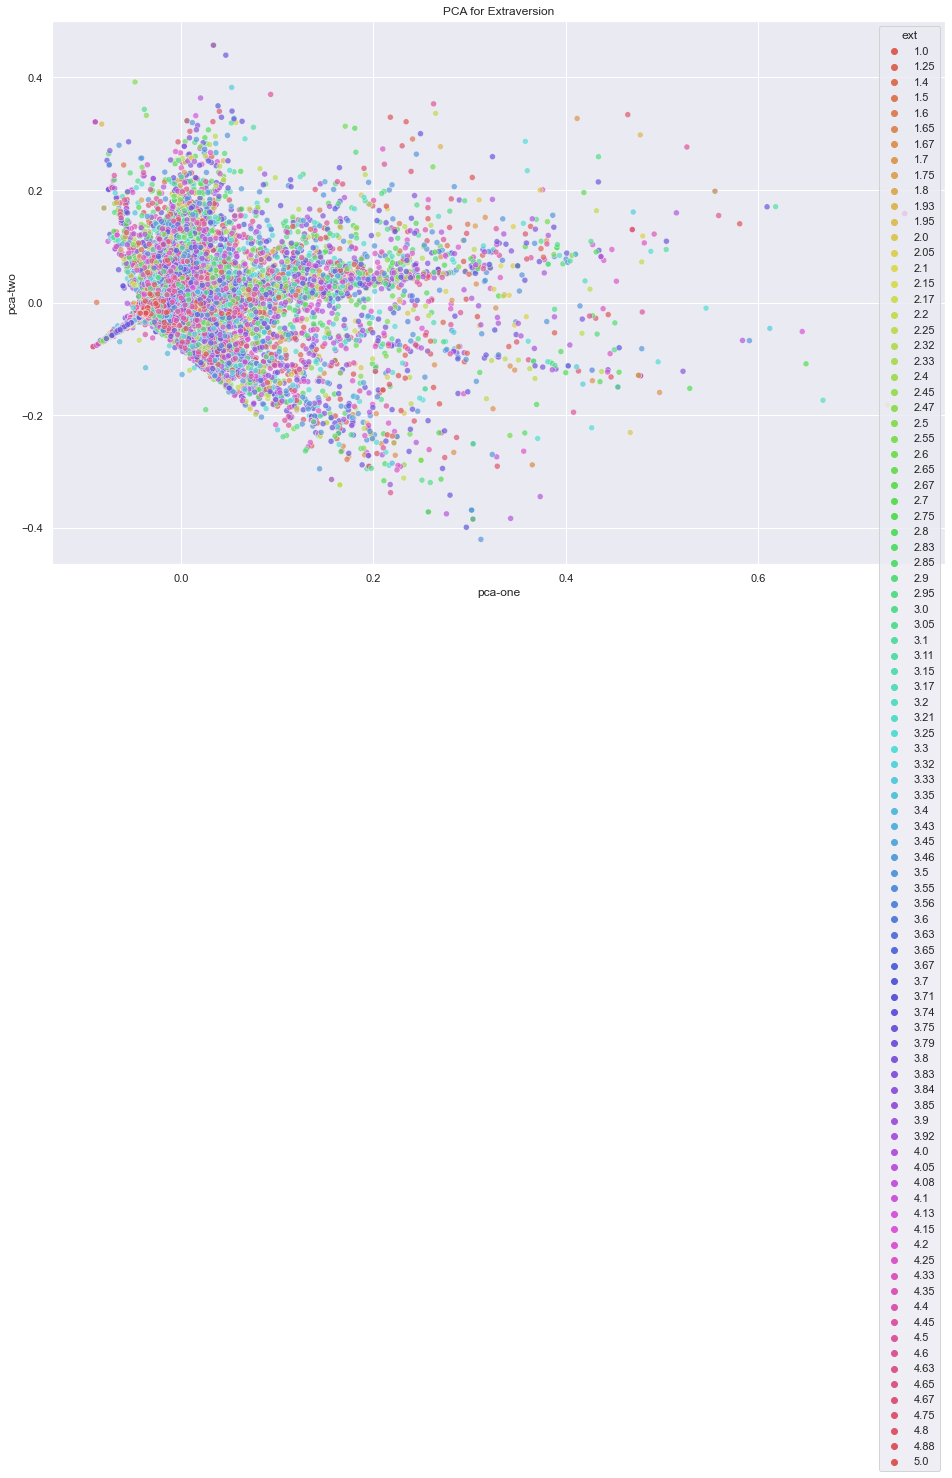

In [110]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= yext,
    palette=sns.color_palette("hls", 92),
    data=df.loc[:,:],
    legend="auto",
    alpha=0.7
)
plt.title ("PCA for Extraversion")

Text(0.5, 1.0, 'PCA for Agreeableness')

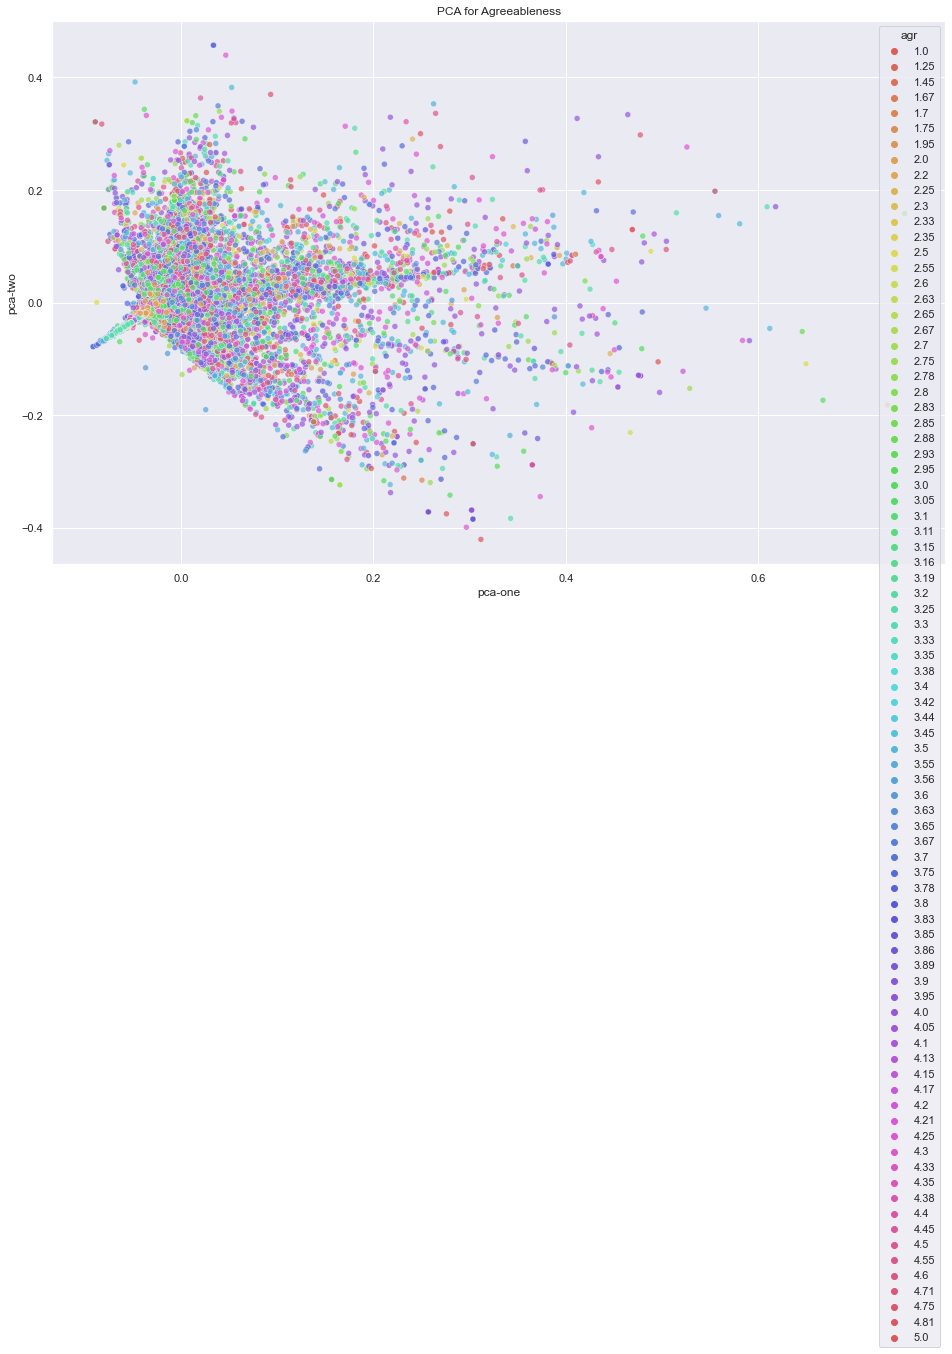

In [109]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= yagr,
    palette=sns.color_palette("hls", 84),
    data=df.loc[:,:],
    legend="auto",
    alpha=0.7
)
plt.title ("PCA for Agreeableness")

Text(0.5, 1.0, 'PCA for Neuroticism')

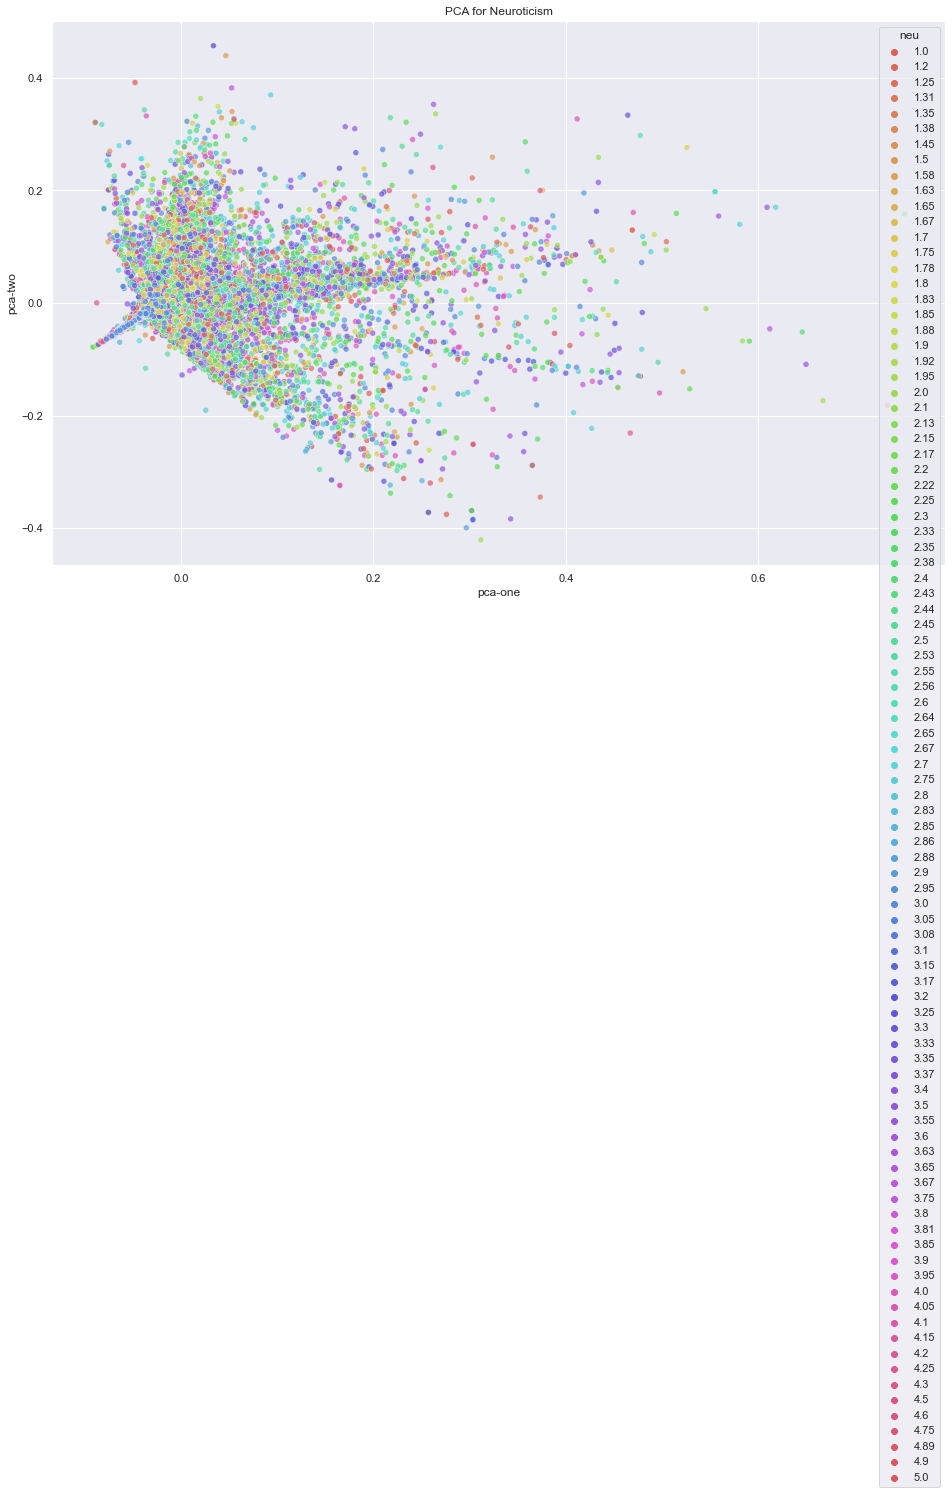

In [108]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= yneu,
    palette=sns.color_palette("hls", 93),
    data=df.loc[:,:],
    legend="auto",
    alpha=0.7
)
plt.title ("PCA for Neuroticism")

## Linear Regression with IncrementalPCA

## Openness

In [66]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.01831
R2 (explained variance): 0.00034
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15764
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Conscientiousness

In [67]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.07341
R2 (explained variance): 0.00539
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20903
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Extraversion 

In [68]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03084
R2 (explained variance): 0.00095
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.25248
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Agreeableness

In [69]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.043
R2 (explained variance): 0.00185
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.18426
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [70]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): -0.0089
R2 (explained variance): 8e-05
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29848
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Random Forest Regression with IncrementalPCA

## [Openess]

In [71]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03588
R2 (explained variance): 0.00129
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.16722
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [conscientiousness]

In [72]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.06579
R2 (explained variance): 0.00433
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.21811
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [73]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.0495
R2 (explained variance): 0.00245
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.26184
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [74]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.01659
R2 (explained variance): 0.00028
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1955
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [75]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.04062
R2 (explained variance): 0.00165
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.31433
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Decision Tree Regression with IncrementalPCA

## [Openess]

In [76]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.02677
R2 (explained variance): 0.00072
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.21223
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [conscientiousness]

In [77]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03288
R2 (explained variance): 0.00108
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.27437
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [78]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.02927
R2 (explained variance): 0.00086
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.32414
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [79]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.0212
R2 (explained variance): 0.00045
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24381
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [80]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_ipca, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.01856
R2 (explained variance): 0.00034
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.40076
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## TruncatedSVD

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 1000)
svd.fit(X)
X_svd = svd.transform(X)

## Linear Regression with TruncatedSVD

## Openness

In [81]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.13483
R2 (explained variance): 0.01818
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15618
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Conscientiousness

In [82]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.18385
R2 (explained variance): 0.0338
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20632
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Extraversion 

In [83]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.16483
R2 (explained variance): 0.02717
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24925
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Agreeableness

In [84]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.14161
R2 (explained variance): 0.02005
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.18317
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [85]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = linear_model.LinearRegression()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.13878
R2 (explained variance): 0.01926
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.2961
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Random Forest Regression with TruncatedSVD

## [Openess]

In [8]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.13658
R2 (explained variance): 0.01865
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15517
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [conscientiousness]

In [10]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.15978
R2 (explained variance): 0.02553
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20545
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [11]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.14729
R2 (explained variance): 0.02169
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24798
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [13]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.12265
R2 (explained variance): 0.01504
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.18211
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [92]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = RandomForestRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R (Correlation Coeffecient): 0.1612
R2 (explained variance): 0.02599
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.2939
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Decision Tree Regression with TruncatedSVD

## [Openess]

In [87]:
yope= df['ope']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yope, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03487
R2 (explained variance): 0.00122
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.20921
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [conscientiousness]

In [88]:
ycon= df['con']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, ycon, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.04671
R2 (explained variance): 0.00218
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.27303
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [extraversion]

In [89]:
yext= df['ext']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yext, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03607
R2 (explained variance): 0.0013
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.32385
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## [agreeableness]

In [90]:
yagr= df['agr']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yagr, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.03011
R2 (explained variance): 0.00091
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24319
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [91]:
yneu= df['neu']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_svd, yneu, test_size = 0.2, random_state = 1)


# call Regression model
model = DecisionTreeRegressor()

# train
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)

# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.04838
R2 (explained variance): 0.00234
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.39342
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## t-SNE Visualization

In [114]:
from sklearn.manifold import TSNE

# Before PCA
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 25355 samples in 0.020s...
[t-SNE] Computed neighbors for 25355 samples in 25.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25355
[t-SNE] Computed conditional probabilities for sample 2000 / 25355
[t-SNE] Computed conditional probabilities for sample 3000 / 25355
[t-SNE] Computed conditional probabilities for sample 4000 / 25355
[t-SNE] Computed conditional probabilities for sample 5000 / 25355
[t-SNE] Computed conditional probabilities for sample 6000 / 25355
[t-SNE] Computed conditional probabilities for sample 7000 / 25355
[t-SNE] Computed conditional probabilities for sample 8000 / 25355
[t-SNE] Computed conditional probabilities for sample 9000 / 25355
[t-SNE] Computed conditional probabilities for sample 10000 / 25355
[t-SNE] Computed conditional probabilities for sample 11000 / 25355
[t-SNE] Computed conditional probabilities for sample 12000 / 25355
[t-SNE] Computed conditional probabilities for s

In [115]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

Text(0.5, 1.0, 't-SNE for Openness')

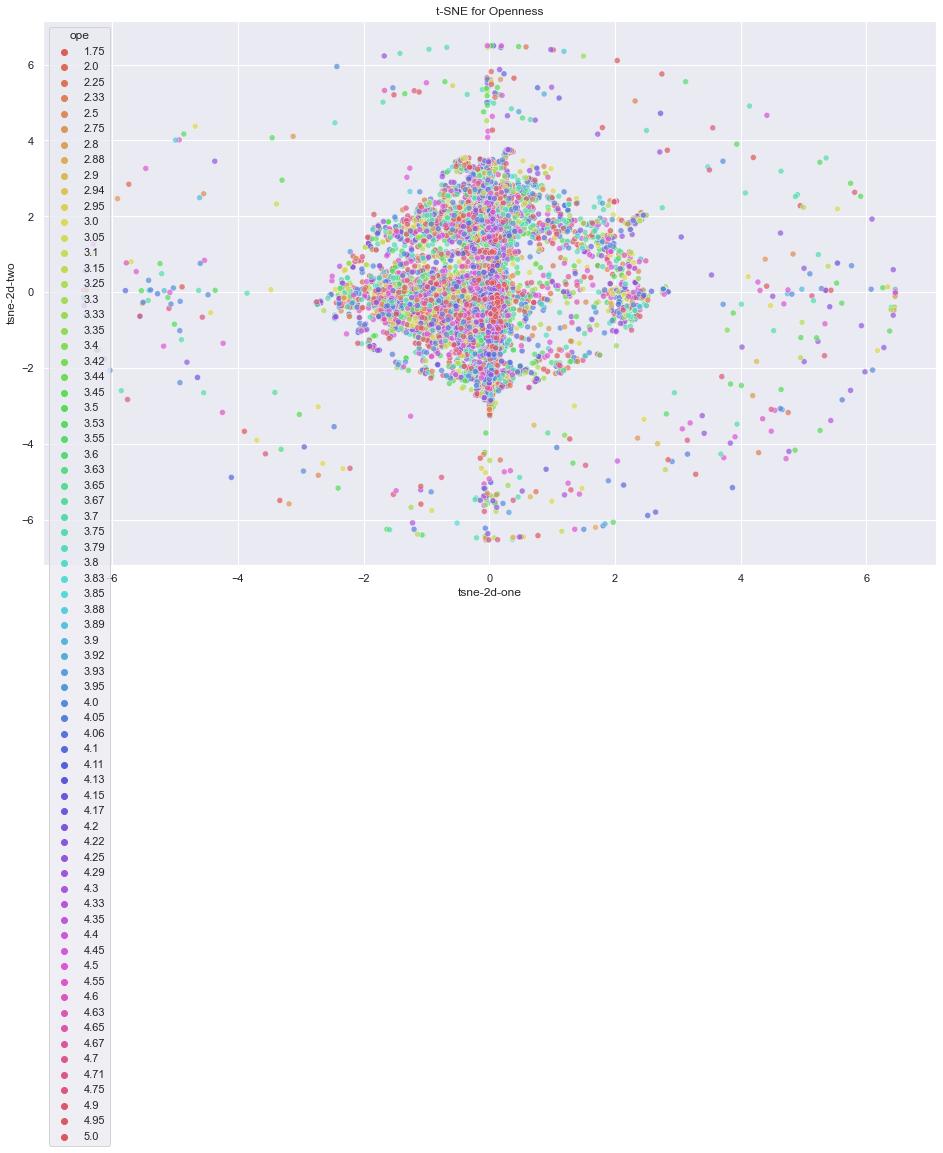

In [119]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=yope,
    palette=sns.color_palette("hls", 71),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Openness")

Text(0.5, 1.0, 't-SNE for Consciousness')

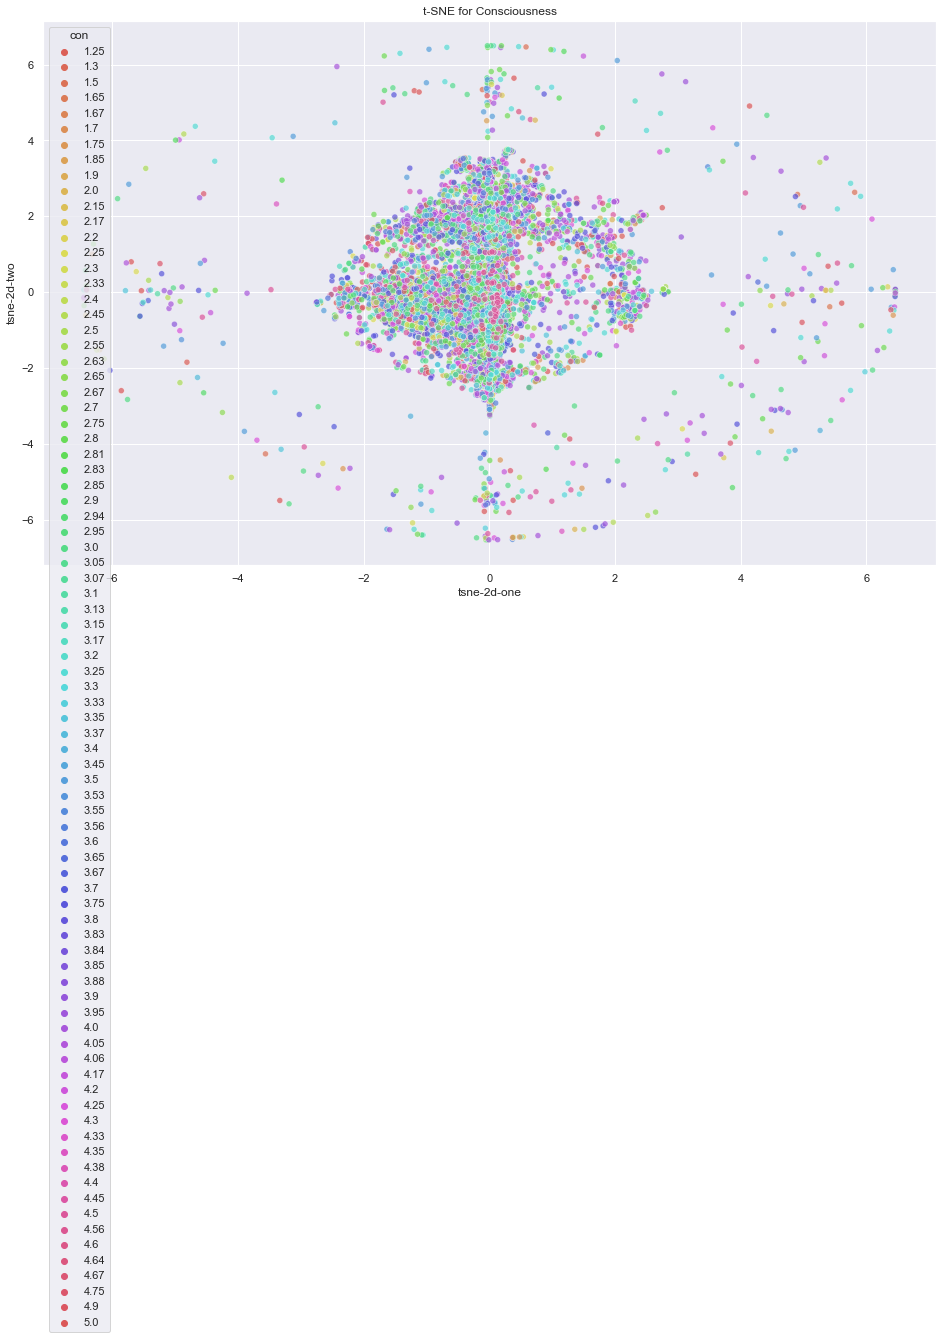

In [120]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=ycon,
    palette=sns.color_palette("hls", 83),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Consciousness")

Text(0.5, 1.0, 't-SNE for Extraversion')

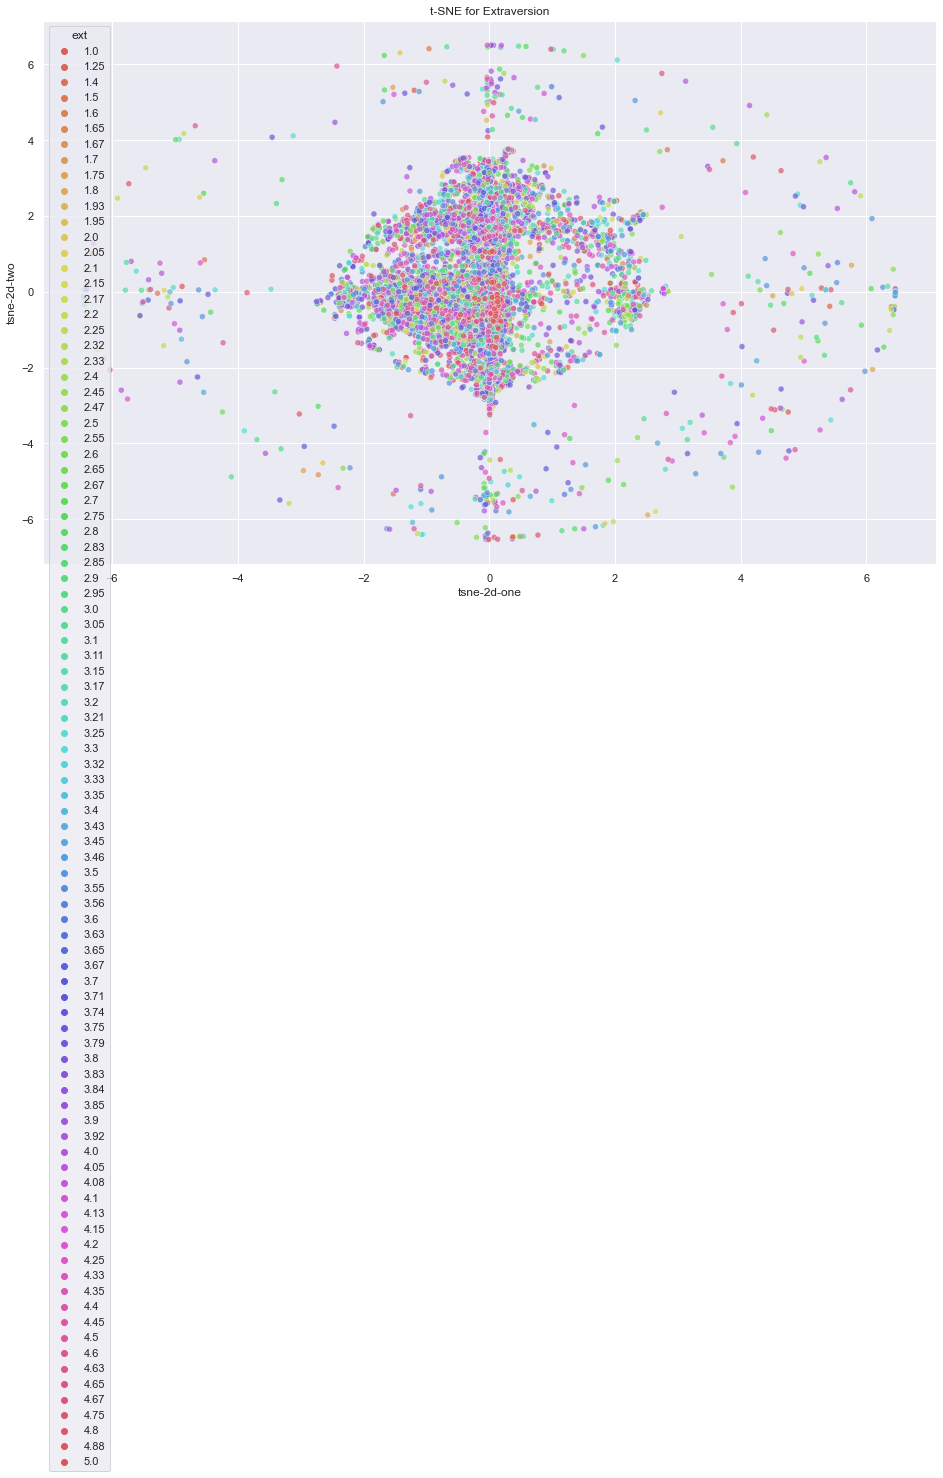

In [121]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=yext,
    palette=sns.color_palette("hls", 92),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Extraversion")

Text(0.5, 1.0, 't-SNE for Agreeableness')

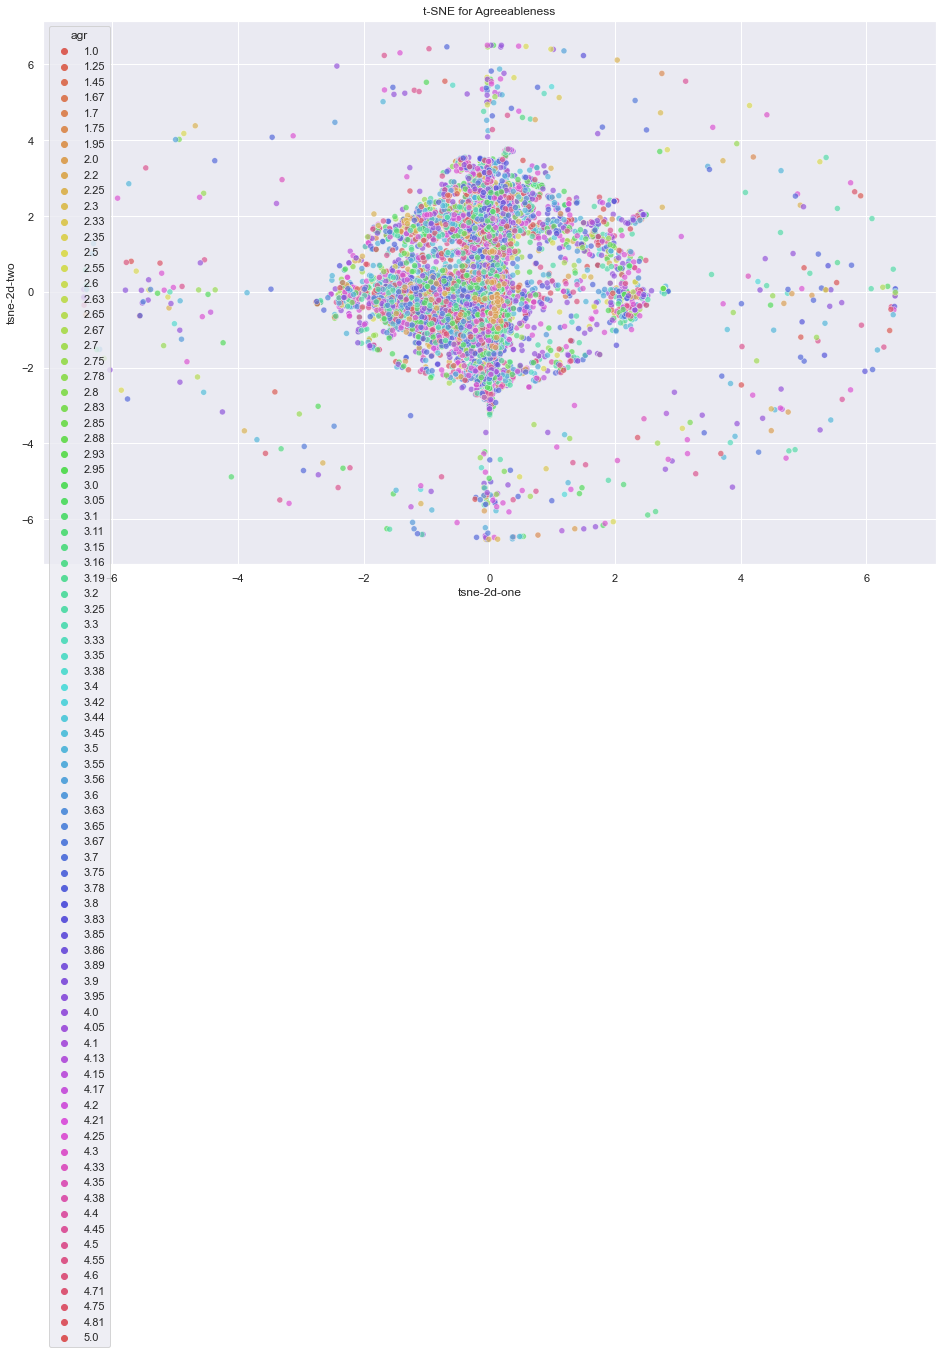

In [122]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=yagr,
    palette=sns.color_palette("hls", 84),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Agreeableness")

Text(0.5, 1.0, 't-SNE for Neuroticism')

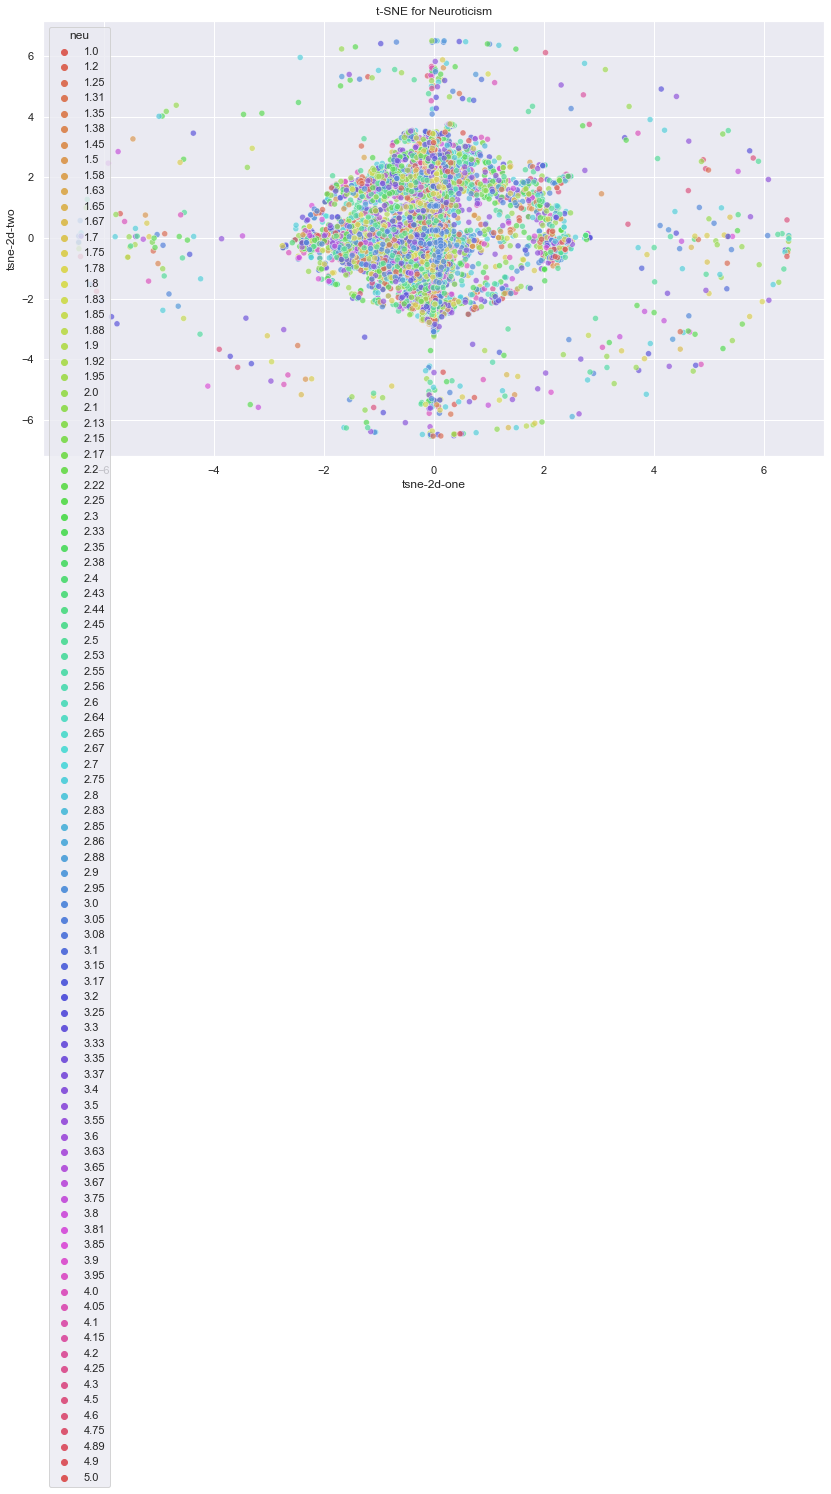

In [124]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=yneu,
    palette=sns.color_palette("hls", 93),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Neuroticism")

In [125]:
# After PCA
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_ipca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 25355 samples in 0.044s...
[t-SNE] Computed neighbors for 25355 samples in 1.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25355
[t-SNE] Computed conditional probabilities for sample 2000 / 25355
[t-SNE] Computed conditional probabilities for sample 3000 / 25355
[t-SNE] Computed conditional probabilities for sample 4000 / 25355
[t-SNE] Computed conditional probabilities for sample 5000 / 25355
[t-SNE] Computed conditional probabilities for sample 6000 / 25355
[t-SNE] Computed conditional probabilities for sample 7000 / 25355
[t-SNE] Computed conditional probabilities for sample 8000 / 25355
[t-SNE] Computed conditional probabilities for sample 9000 / 25355
[t-SNE] Computed conditional probabilities for sample 10000 / 25355
[t-SNE] Computed conditional probabilities for sample 11000 / 25355
[t-SNE] Computed conditional probabilities for sample 12000 / 25355
[t-SNE] Computed conditional probabilities for sa

In [126]:
df['tsne-2d-one-pca'] = tsne_results[:,0]
df['tsne-2d-two-pca'] = tsne_results[:,1]

Text(0.5, 1.0, 't-SNE for Openness with PCA')

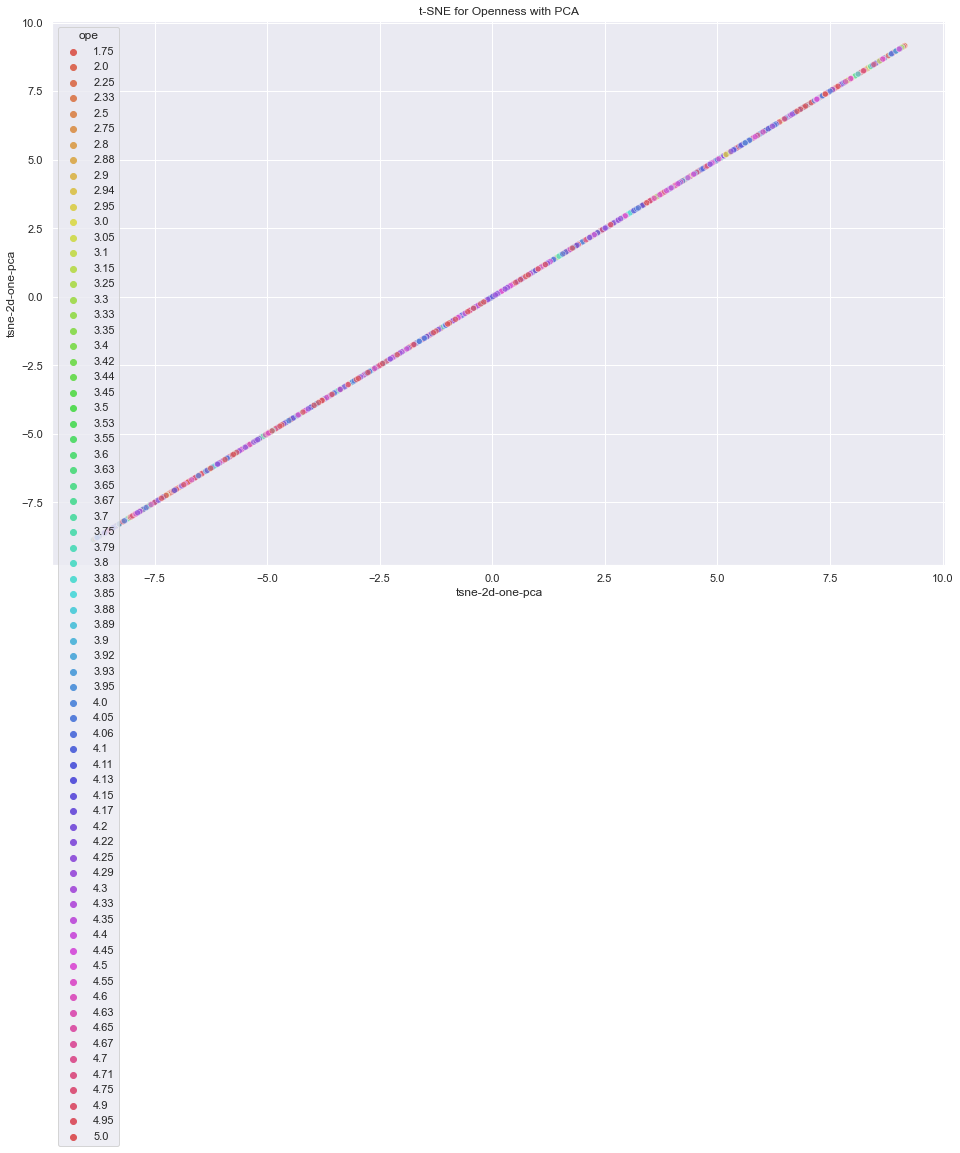

In [129]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one-pca", y="tsne-2d-one-pca",
    hue=yope,
    palette=sns.color_palette("hls", 71),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Openness with PCA")

Text(0.5, 1.0, 't-SNE for Consciousness with PCA')

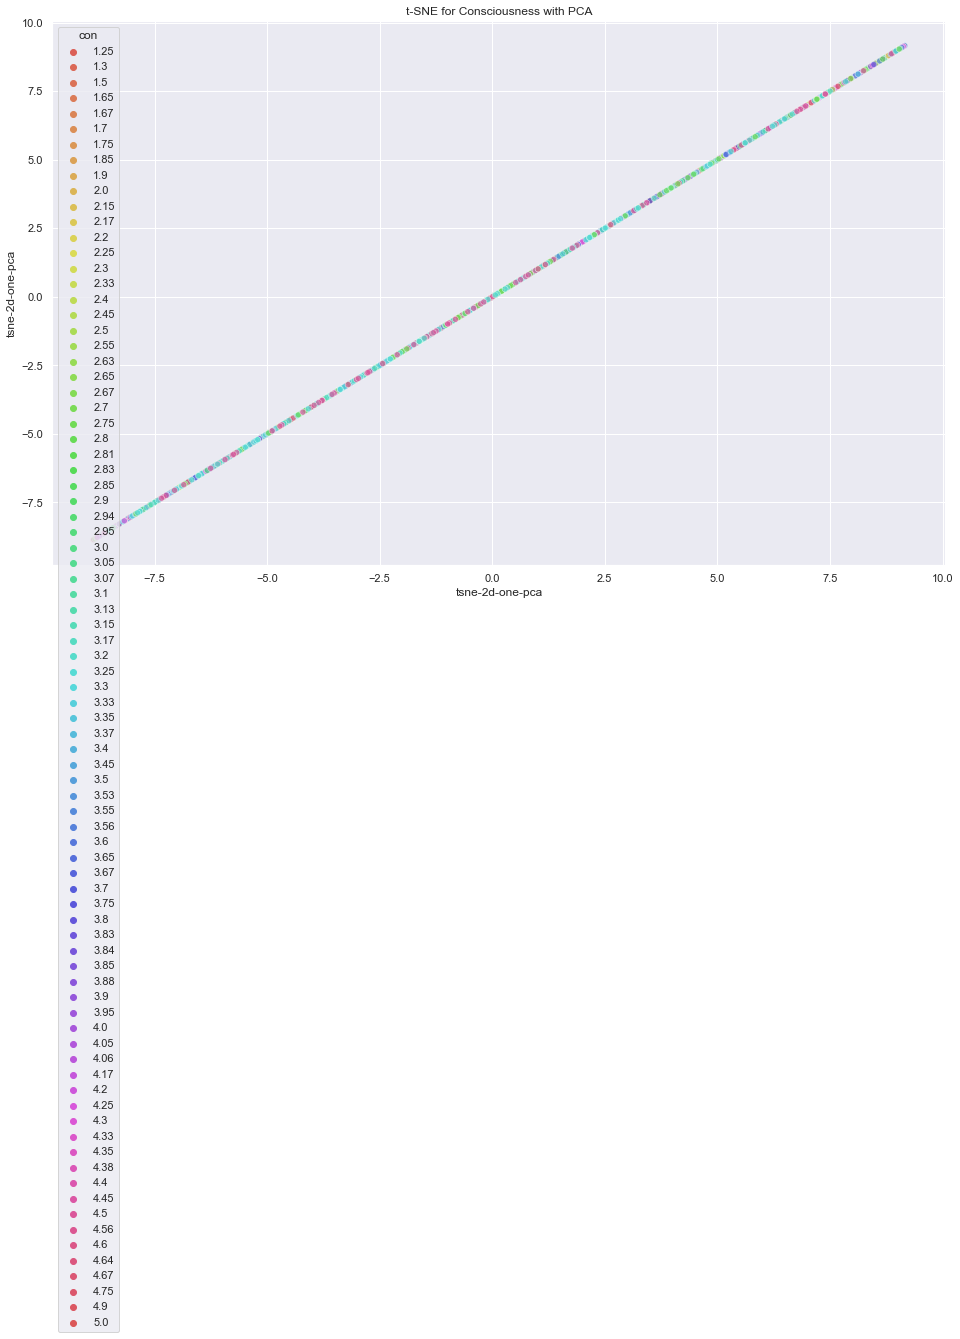

In [130]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one-pca", y="tsne-2d-one-pca",
    hue=ycon,
    palette=sns.color_palette("hls", 83),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Consciousness with PCA")

Text(0.5, 1.0, 't-SNE for Neuroticism with PCA')

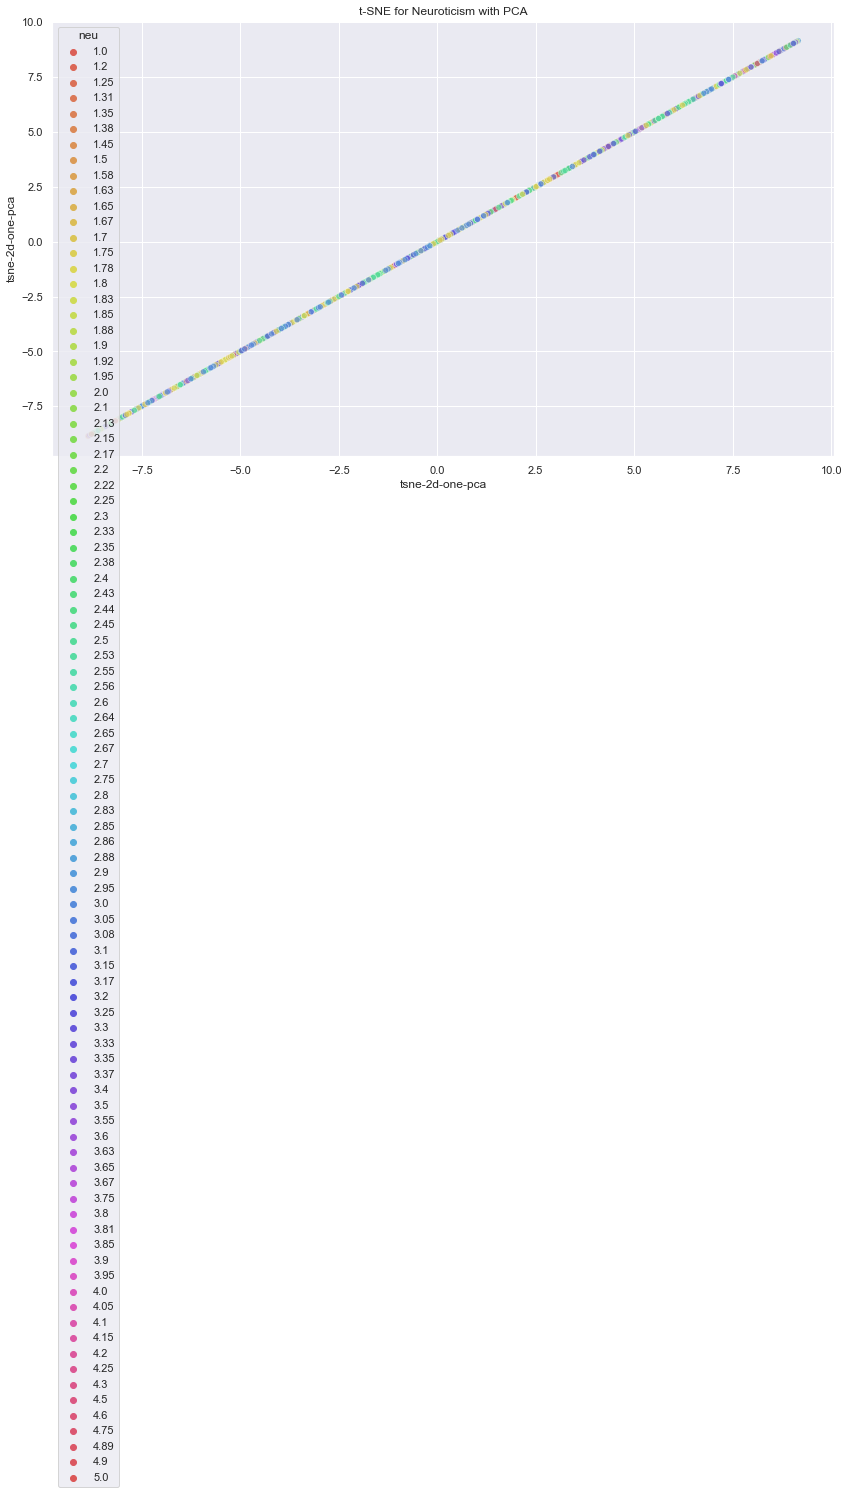

In [132]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne-2d-one-pca", y="tsne-2d-one-pca",
    hue=yneu,
    palette=sns.color_palette("hls", 93),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title ("t-SNE for Neuroticism with PCA")

## Deep Leerning (MLP regressor)/ not run because of the computation time required

## Openness

In [23]:
yope= df['ope']

#X, y = make_regression(n_samples=200, random_state=1)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yope, test_size = 0.2, random_state = 1)

# call Regression model
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# train
model.fit(X_train, y_train)

# test
model.predict(X_test[:2])

# Testing
#regr.score(X_test, y_test)


/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([4.61578222, 3.18929663])

In [ ]:
# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

## Conscientiousness

In [ ]:
ycon= df['con']

#X, y = make_regression(n_samples=200, random_state=1)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, ycon, test_size = 0.2, random_state = 1)

# call Regression model
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# train
model.fit(X_train, y_train)

# test
model.predict(X_test[:2])

# Testing
#regr.score(X_test, y_test)


In [ ]:
# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

## Extraversion 

In [ ]:
yext= df['ext']

#X, y = make_regression(n_samples=200, random_state=1)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yext, test_size = 0.2, random_state = 1)

# call Regression model
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# train
model.fit(X_train, y_train)

# test
model.predict(X_test[:2])

# Testing
#regr.score(X_test, y_test)


In [ ]:
# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

## Agreeableness

In [ ]:
yagr= df['agr']

#X, y = make_regression(n_samples=200, random_state=1)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yagr, test_size = 0.2, random_state = 1)

# call Regression model
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# train
model.fit(X_train, y_train)

# test
model.predict(X_test[:2])

# Testing
#regr.score(X_test, y_test)


In [9]:
# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

R (Correlation Coeffecient): 0.13658
R2 (explained variance): 0.01865
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15517
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Neuroticism

In [ ]:
yneu= df['neu']

#X, y = make_regression(n_samples=200, random_state=1)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, yneu, test_size = 0.2, random_state = 1)

# call Regression model
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# train
model.fit(X_train, y_train)

# test
model.predict(X_test[:2])

# Testing
#regr.score(X_test, y_test)


In [ ]:
# evaluation testing
corr_matrix = np.corrcoef(y_test, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R (Correlation Coeffecient):", round(corr,5))
print("R2 (explained variance):", round(R_sq, 5))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/y_test)), 5))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.00000f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.00000f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

# PCA Tested, yet it ruins because of the computation cost

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x = X.toarray()
pca.fit(x)
reduced = svd.transform(x)